<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/YB_5_31_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [5]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) 데이터 불러오기 및 탐색

In [6]:
sales = pd.read_csv("/content/drive/MyDrive/product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [7]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [8]:
#모델 생성
kmeans = KMeans(n_clusters=3, random_state=0)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [9]:
kmeans.fit(sales)
pred= kmeans.predict(sales)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [22]:
sales['cluster']=pred

## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [23]:
salesDF=sales.drop(['cluster'], axis=1)

3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [24]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca = PCA(n_components=2)

pca_result = pca.fit_transform(salesDF)

# PCA 결과를 DataFrame으로 변환하여 pca_x와 pca_y로 저장
sales['pca_x'] = pca_result[:, 0]
sales['pca_y'] = pca_result[:, 1]


3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

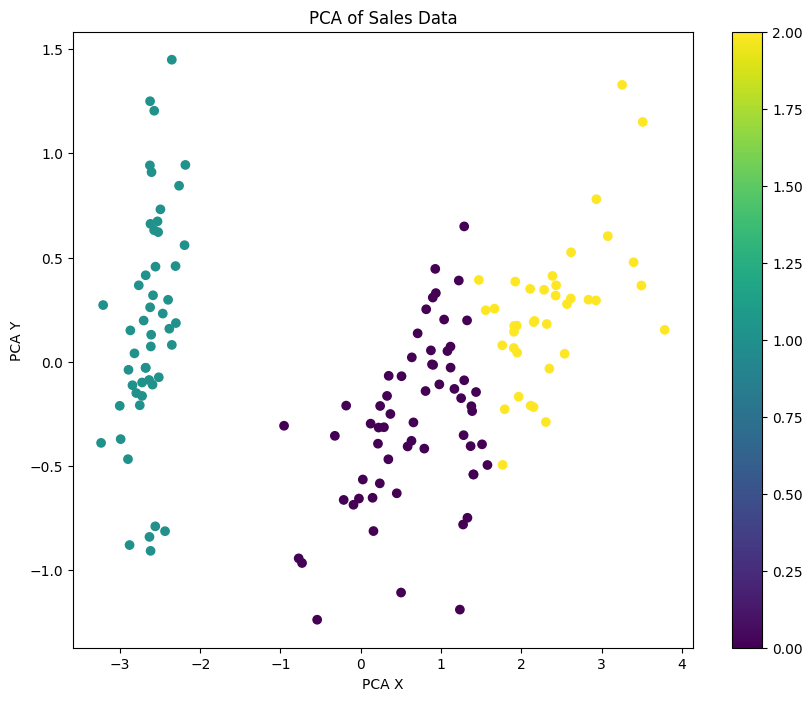

In [25]:
plt.figure(figsize=(10,8))
scatter= plt.scatter(sales['pca_x'], sales['pca_y'],c=sales['cluster'],cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PCA X')
plt.ylabel('PCA Y')
plt.title('PCA of Sales Data')
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

In [26]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [27]:
#sales의 모든 데이터에 실루엣 계수 구하기
silhouette_vals = silhouette_samples(sales, sales['cluster'])

In [28]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_coeff']=silhouette_vals

4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [29]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
avg_silhouette = silhouette_score(sales, sales['cluster'])
avg_silhouette

0.6695115503952082

4-3) 군집별 평균 실루엣 계수를 구하세요.

In [30]:
#군집별 평균 실루엣 계수 구하기
cluster_avg_silhouette = sales.groupby('cluster')['silhouette_coeff'].mean()
print('군집별 평균 실루엣 계수:\n')
print(cluster_avg_silhouette)


군집별 평균 실루엣 계수:

cluster
0    0.612467
1    0.765230
2    0.642197
Name: silhouette_coeff, dtype: float64
